In [ ]:
# Import delle librerie utilitarie

# Librerie per generare i circuiti quantistici e quelli 
# traspilati
from qiskit import QuantumCircuit, QuantumRegister

# Modulo di qiskit per la visualizzazione delle elementi tramite sistemi grafici
# tipo sfera di bloch ecc.
from qiskit.visualization import array_to_latex

# Librerie utili per la simulazione dei circuiti tramite il
# sistema IBM, quindi simula il funzionamento del qubit sempre
# nei loro casi ideali
from qiskit_aer import AerSimulator

from qiskit_experiments.library import ProcessTomography

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Operazioni matematiche
from qiskit.quantum_info import Operator

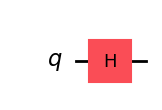

In [ ]:
# Creazione dei un sistema quantistico a N qubit indicizzati tramite la label
q = QuantumRegister(1,'q')

# Genero il primo circuito per modellare il processo
circuit = QuantumCircuit(q)

# Come primo esempio sottoponiamo il processo ad una porta di Hadamard
circuit.h(q[0])

# Disegno il circuito che voglio
circuit.draw(output='mpl')

In [7]:
# Definiamo una matrice unitaria, restituendo l'operatore desiderato
target_unitary = Operator(circuit)

#print(target_unitary)

array_to_latex(target_unitary)

<IPython.core.display.Latex object>

ProcessTomography_(0,)_(0,)


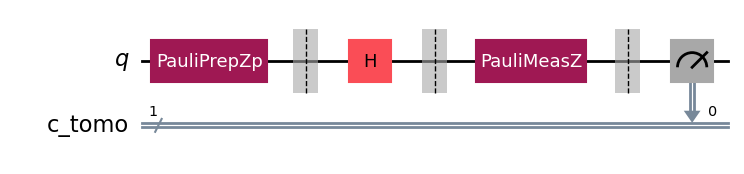

ProcessTomography_(1,)_(0,)


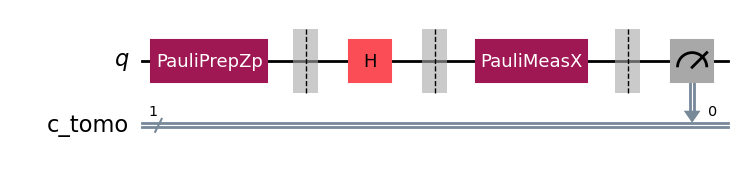

ProcessTomography_(2,)_(0,)


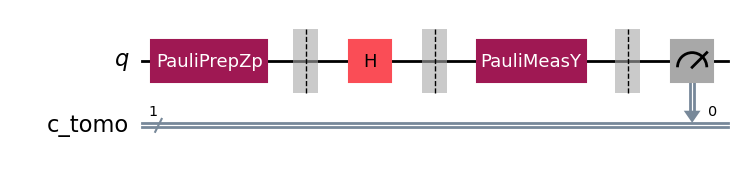

ProcessTomography_(0,)_(1,)


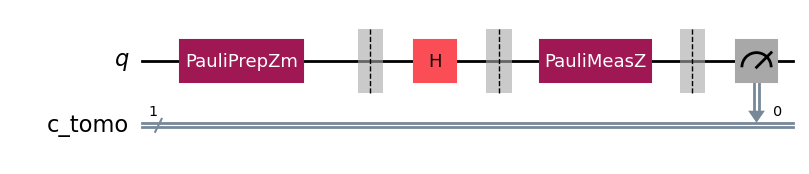

ProcessTomography_(1,)_(1,)


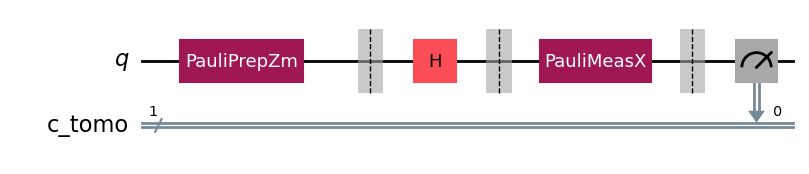

ProcessTomography_(2,)_(1,)


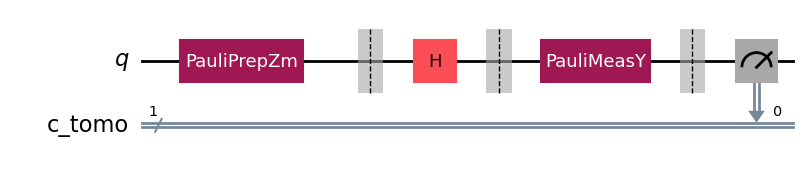

ProcessTomography_(0,)_(2,)


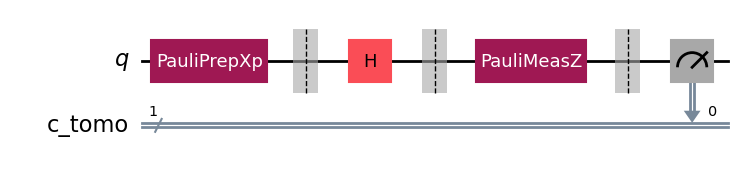

ProcessTomography_(1,)_(2,)


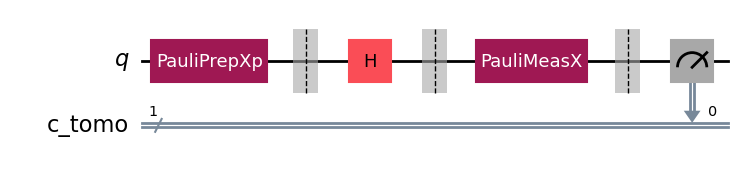

ProcessTomography_(2,)_(2,)


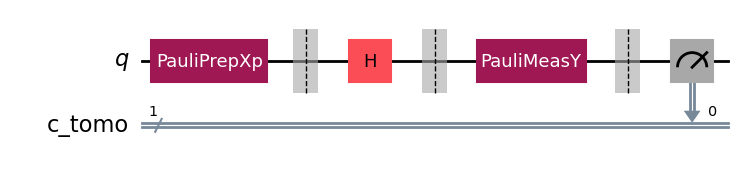

ProcessTomography_(0,)_(3,)


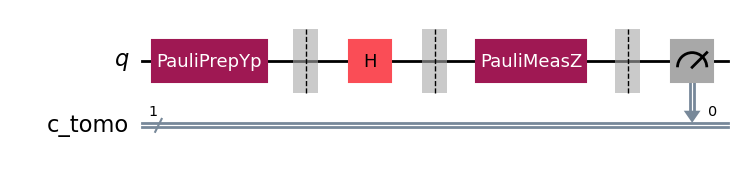

ProcessTomography_(1,)_(3,)


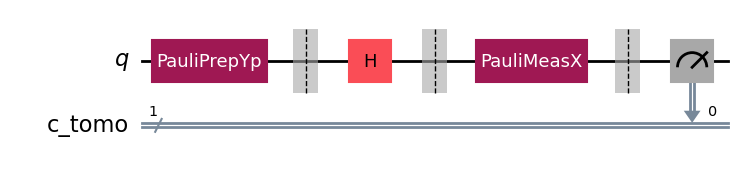

ProcessTomography_(2,)_(3,)


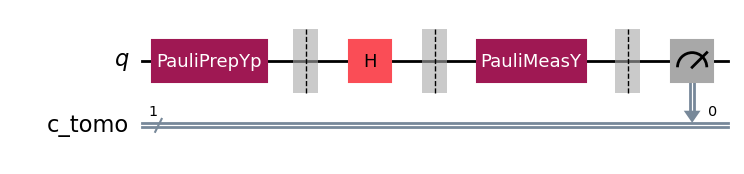

In [ ]:
# Basic e Aer, è che Aer supporta delle tipologie di errore
simulator = AerSimulator()

# Oggetto di tipo Process Tomography
circuit_tomo = ProcessTomography(circuit, simulator)
circuits = circuit_tomo.circuits()

# Tale for è ai fini dimostrativi per il contenuto della libreria di state-tomography
for circ in circuits:
    print(circ.name)
    display(circ.draw(output='mpl'))


In [ ]:
results = circuit_tomo.run(simulator, shots=10)

# La variabile result è molto complicata (come puoi vedere dalla seguente print)
# Tutto associato a dati e metadati che vengono collectati
print(results.data())

[{'counts': {'1': 5, '0': 5}, 'job_id': '0ac410e1-f38a-4b1c-8d12-86493d910bc5', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [0], 'p_idx': [0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'0': 10}, 'job_id': '0ac410e1-f38a-4b1c-8d12-86493d910bc5', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [1], 'p_idx': [0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'1': 5, '0': 5}, 'job_id': '0ac410e1-f38a-4b1c-8d12-86493d910bc5', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [2], 'p_idx': [0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'0': 1, '1': 9}, 'job_id': '0ac410e1-f38a-4b1c-8d12-86493d910bc5', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [0], 'p_idx': [1]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'1': 10}, 'job_id': '0ac410e1-f38a-4b1c-8d12-86493d910bc5', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [1], 'p_idx': [1]}, 'shots':

In [ ]:
experimental_result = results.analysis_results("state").value

# Rappresentazione adottata da qiskti per la choi matrix
# Operazioni facilmente implementabili in sistemi
array_to_latex(experimental_result)

<IPython.core.display.Latex object>

In [ ]:
# Come confrontiamo la choi con quella del nostro circuito?
# Importare le due metriche che ci servono
from qiskit.quantum_info import Choi
from qiskit.quantum_info import process_fidelity

# Sui processi viene definita una fidelity sulle choi matrix, e ciò è chiamato 
# Process Fidelity

# Calcolo la choi del circuito ideale
choi_unitary = Choi(circuit)

# Stampa della choi ideale
print(choi_unitary)

# Stampa della choi simulata
print(experimental_result)

Choi([[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
      [ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
      [ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
      [-0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
     input_dims=(2,), output_dims=(2,))
Choi([[ 0.48445106+0.00000000e+00j,  0.40971952-1.51632599e-01j,
        0.36017419+1.47418871e-01j, -0.53014621+1.05561315e-02j],
      [ 0.40971952+1.51632599e-01j,  0.47426394+0.00000000e+00j,
        0.29311378+2.42366045e-01j, -0.50943252-2.42696677e-01j],
      [ 0.36017419-1.47418871e-01j,  0.29311378-2.42366045e-01j,
        0.32789088+0.00000000e+00j, -0.42114549+1.35763199e-01j],
      [-0.53014621-1.05561315e-02j, -0.50943252+2.42696677e-01j,
       -0.42114549-1.35763199e-01j,  0.71339413-6.93889390e-18j]],
     input_dims=(2,), output_dims=(2,))


In [12]:
# Calcolo della "differenza" tra le due choi matrix, il che mostra
# come tali matrici vengono correlate
fidelity = process_fidelity(channel=experimental_result, target=choi_unitary)

# Stampa della fidelity
print('Process Fidelity: F = {:.5f}'.format(fidelity))

Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-0.18182508  0.18182508]


Process Fidelity: F = 0.88093


Provo a simulare i risultati con un software di simulazione "rumoroso"

In [13]:
# Importo le librerie per simulare un canale "rumoroso"
from qiskit_ibm_runtime.fake_provider import FakeManilaV2, FakeAlmadenV2,FakeNairobiV2

# Importo un simulatore 
fake_backend = FakeNairobiV2()

# Calcolo il result applicando il simulatore "rumoroso"
result = circuit_tomo.run(fake_backend, shots=10)


Adding a job from a backend (AerSimulator('aer_simulator'
             noise_model=<NoiseModel on ['cx', 'x', 'measure', 'sx', 'id', 'reset']>)) that is different than the current backend (<qiskit_ibm_runtime.fake_provider.backends.nairobi.fake_nairobi.FakeNairobiV2 object at 0x7fab95281ee0>). The new backend will be used, but service is not changed if one already exists.


Da qui ho solo compiato il codice precedente

In [14]:
experimental_result = results.analysis_results("state").value

# Rappresentazione adottata da qiskti per la choi matrix
# Operazioni facilmente implementabili in sistemi
array_to_latex(experimental_result)

<IPython.core.display.Latex object>

Non rigenero la Choi del circuito ideale poichè utilizzo quella generata nel precedente esempio

In [16]:
# Calcolo della "differenza" tra le due choi matrix, il che mostra
# come tali matrici vengono correlate
fidelity = process_fidelity(channel=experimental_result, target=choi_unitary)

# Stampa della fidelity
print('Process Fidelity: F = {:.5f}'.format(fidelity))

Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-0.18182508  0.18182508]


Process Fidelity: F = 0.88093


IMPORTANTE: Capire cos'è la process tomography

In [ ]:
# Quiskit prepara tanti possibili stati di input
# per cercare di trovare la soluzione
# Process Tomography = Insieme di state Tomography applicata a circuiti
# i quali sono ricostruiti secondo una certa struttura

Parte di codice per eseguire il codice in cloud

In [ ]:
# Come faccio a simulare il mio circuito su una parte "reale"
# Scelgo su quale runtime del mio profilo accedere
service = QiskitRuntimeService(name="personal")

# Una volta eseguito tutto, bisogna mandare il job, che non è setto sia 
# eseguito subito perchè bisogna aspettare una coda che non è del tutto 
# fair, per cui i tempi di attesa sono molto, ma molto, lunghi.